# With Preprocessing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/Dataset/After_preprocessing_Maternal-Health-Risk-Data-Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BP
0,25,130,80,15.0,98.0,86,3.0,3.0
1,35,140,90,13.0,98.0,70,3.0,3.0
2,29,90,70,8.0,100.0,80,3.0,2.0
3,30,140,85,7.0,98.0,70,3.0,3.0
4,35,120,60,6.1,98.0,76,1.0,2.0


In [4]:
# Run commands for beautifying figures
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
from sklearn.linear_model import SGDClassifier

In [7]:
X = df.drop(columns = 'RiskLevel')
y = df['RiskLevel']

In [8]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#smote = SMOTE(sampling_strategy='minority')
#X_sm, y_sm = smote.fit_sample(X, y)

#y_sm.value_counts()
y.value_counts()

3.0    406
1.0    406
2.0    406
Name: RiskLevel, dtype: int64

In [9]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BP
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,2.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,2.0


In [10]:
y.head()

0    3.0
1    3.0
2    3.0
3    3.0
4    1.0
Name: RiskLevel, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(974, 7) (974,) (244, 7) (244,)


In [12]:
X_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BP
432,40,140,100,13.000000,101.000000,66,3.0
277,60,120,85,15.000000,98.000000,60,2.0
721,28,85,60,9.000000,101.000000,86,1.0
1062,29,130,70,7.759601,98.000000,78,2.0
678,23,140,80,7.010000,98.000000,70,3.0
...,...,...,...,...,...,...,...
1044,19,120,80,7.000000,98.000000,70,3.0
1095,35,140,100,7.500000,98.000000,66,3.0
1130,59,120,85,15.439114,98.000000,60,2.0
860,17,90,63,6.900000,101.000000,70,2.0


In [13]:
y_train

432     3.0
277     3.0
721     2.0
1062    2.0
678     3.0
       ... 
1044    2.0
1095    3.0
1130    3.0
860     2.0
1126    3.0
Name: RiskLevel, Length: 974, dtype: float64

In [14]:
X_train.columns.values

array(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'BP'], dtype=object)

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler transformation to the test set
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled datasets
print(X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape)

(974, 7) (974,) (244, 7) (244,)


In [16]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
SGDClf = linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")
SGDClf.fit(X_train_scaled, y_train)
print('Accuracy ', accuracy_score(y_test, SGDClf.predict(X_test_scaled)).round(3))

Accuracy  0.623


In [17]:
y_pred = SGDClf.predict(X_test_scaled)

# Without Preprocessing

In [18]:
df_before = pd.read_csv('/content/drive/MyDrive/CSE445/Dataset/Maternal-Health-Risk-Data-Set.csv')
df_before.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [19]:
# Define mapping dictionary
risk_mapping = {'high risk': 3.0, 'mid risk': 2.0, 'low risk': 1.0}

# Convert string column to float using mapping dictionary
df_before['RiskLevel'] = df_before['RiskLevel'].map(risk_mapping)

In [20]:
Before_Feature = df_before.drop(columns = 'RiskLevel')
Before_Target = df_before['RiskLevel']

In [22]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
Before_Feature, Before_Target = oversample.fit_resample(Before_Feature, Before_Target)

#smote = SMOTE(sampling_strategy='minority')
#X_sm, y_sm = smote.fit_sample(X, y)

#y_sm.value_counts()
Before_Target.value_counts()

3.0    406
1.0    406
2.0    406
Name: RiskLevel, dtype: int64

In [23]:
Before_Feature

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.000000,98.00000,86
1,35,140,90,13.000000,98.00000,70
2,29,90,70,8.000000,100.00000,80
3,30,140,85,7.000000,98.00000,70
4,35,120,60,6.100000,98.00000,76
...,...,...,...,...,...,...
1213,32,140,100,7.579273,98.00000,78
1214,29,120,78,7.657597,100.65371,73
1215,35,85,60,11.000000,102.00000,86
1216,40,160,100,19.000000,98.00000,77


In [24]:
Before_Target.to_frame()

,RiskLevel
0,3.0
1,3.0
2,3.0
3,3.0
4,1.0
...,...
1213,3.0
1214,3.0
1215,3.0
1216,3.0


In [25]:
from sklearn.model_selection import train_test_split
Before_X_train, Before_X_test, Before_y_train, Before_y_test = train_test_split(Before_Feature, Before_Target, test_size = 0.2, random_state = 42)
print(Before_X_train.shape, Before_y_train.shape, Before_X_test.shape, Before_y_test.shape)

(974, 6) (974,) (244, 6) (244,)


In [26]:
Before_X_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
432,40,140,100,13.000000,101.000000,66
277,60,120,85,15.000000,98.000000,60
721,28,85,60,9.000000,101.000000,86
1062,29,130,70,7.748722,98.000000,78
678,23,140,80,7.010000,98.000000,70
...,...,...,...,...,...,...
1044,13,90,65,7.881148,101.000000,80
1095,28,140,100,15.000000,98.163238,70
1130,32,90,70,8.391956,99.216089,80
860,17,90,63,6.900000,101.000000,70


In [27]:
Before_y_train

432     3.0
277     3.0
721     2.0
1062    2.0
678     3.0
       ... 
1044    2.0
1095    3.0
1130    3.0
860     2.0
1126    3.0
Name: RiskLevel, Length: 974, dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training set and transform it
Before_X_train_scaled = scaler.fit_transform(Before_X_train)

# Apply the same scaler transformation to the test set
Before_X_test_scaled = scaler.transform(Before_X_test)

# Check the shapes of the scaled datasets
print(Before_X_train_scaled.shape, y_train.shape, Before_X_test_scaled.shape, y_test.shape)


(974, 6) (974,) (244, 6) (244,)


In [29]:
Before_SGDClf = linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")
Before_SGDClf.fit(Before_X_train_scaled, Before_y_train)
print('Accuracy ', accuracy_score(Before_y_test, Before_SGDClf.predict(Before_X_test_scaled)).round(3))

Accuracy  0.59


In [30]:
Before_y_pred = Before_SGDClf.predict(Before_X_test_scaled)

# Classification Report and Confusion mectrics

### W-Preprocess

In [31]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.67      0.40      0.50        87
         2.0       0.47      0.77      0.58        81
         3.0       0.90      0.72      0.80        76

    accuracy                           0.62       244
   macro avg       0.68      0.63      0.63       244
weighted avg       0.68      0.62      0.62       244



In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

<Axes: >

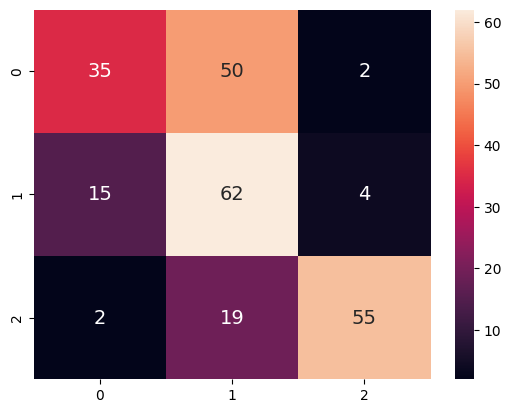

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

### W/O-Preprocess

In [34]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(Before_y_test, Before_y_pred))

              precision    recall  f1-score   support

         1.0       0.51      0.70      0.59        87
         2.0       0.50      0.30      0.37        81
         3.0       0.77      0.78      0.77        76

    accuracy                           0.59       244
   macro avg       0.59      0.59      0.58       244
weighted avg       0.59      0.59      0.57       244



<Axes: >

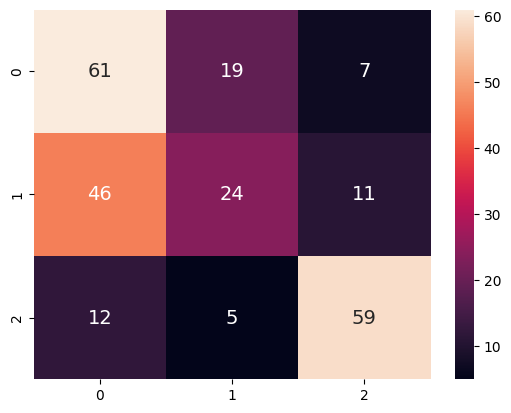

In [35]:
After_cm = confusion_matrix(Before_y_test, Before_y_pred)
sns.heatmap(After_cm, annot = True)